# Import Dependencies

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import matplotlib.pyplot as plt
import os

## Import Dataset

In [20]:
datagen = ImageDataGenerator(
    rescale = 1./255.0,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 45,
    validation_split = 0.1,
)

train_generator = datagen.flow_from_directory(
    'Alzheimer_s Dataset/train',
    target_size = (175, 175),
    batch_size = 10,
    class_mode = 'sparse',
    shuffle = True,
    subset = 'training',
)
val_generator = datagen.flow_from_directory(
    'Alzheimer_s Dataset/test',
    target_size = (175, 175),
    batch_size = 10,
    shuffle = False,
    class_mode = 'sparse',
    subset = 'validation',
)

Found 4610 images belonging to 4 classes.
Found 126 images belonging to 4 classes.


# Model

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(175,175,3)),
    tf.keras.layers.MaxPool2D((3,3),2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D((3,3),2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D((3,3),2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 175, 175, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 87, 87, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 43, 43, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 21, 21, 32)      

# Training

In [52]:
# Early Stopping Callback
Early_Stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    min_delta =0
)

In [53]:
model.compile(
    optimizer='Adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [101]:
hist = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    shuffle=True,
    #callbacks=[Early_Stopping]
)

Epoch 1/100
461/461 [==============================] - 30s 65ms/step - loss: 0.1862 - accuracy: 0.9319 - val_loss: 0.3027 - val_accuracy: 0.8810
Epoch 2/100
461/461 [==============================] - 29s 64ms/step - loss: 0.1669 - accuracy: 0.9430 - val_loss: 0.2265 - val_accuracy: 0.9286
Epoch 3/100
461/461 [==============================] - 30s 65ms/step - loss: 0.1761 - accuracy: 0.9356 - val_loss: 0.3243 - val_accuracy: 0.8810
Epoch 4/100
461/461 [==============================] - 30s 64ms/step - loss: 0.1918 - accuracy: 0.9321 - val_loss: 0.2848 - val_accuracy: 0.8968
Epoch 5/100
461/461 [==============================] - 29s 64ms/step - loss: 0.1720 - accuracy: 0.9408 - val_loss: 0.2424 - val_accuracy: 0.9206
Epoch 6/100
461/461 [==============================] - 30s 65ms/step - loss: 0.1803 - accuracy: 0.9325 - val_loss: 0.2674 - val_accuracy: 0.8968
Epoch 7/100
461/461 [==============================] - 31s 66ms/step - loss: 0.1779 - accuracy: 0.9388 - val_loss: 0.2873 - val_ac

KeyboardInterrupt: 

# Data Visualization

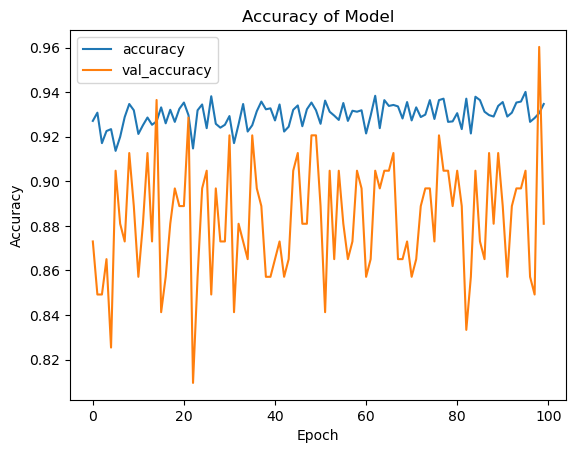

In [ ]:
# Accuracy Graph
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy of Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy','val_accuracy'])

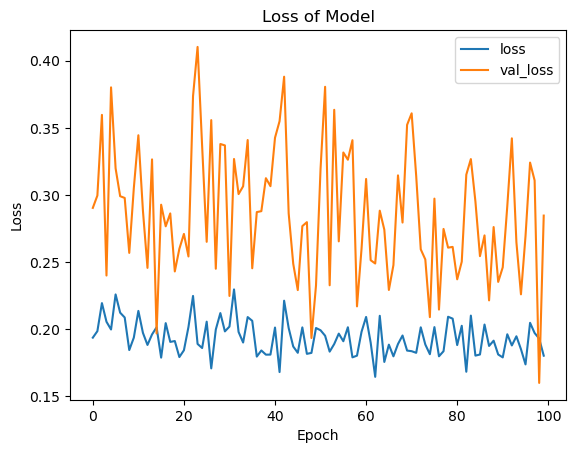

In [ ]:
# Loss Graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss of Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'])

# Evaluation

In [ ]:
model.evaluate(val_generator)

13/13 [==============================] - 1s 37ms/step - loss: 0.2523 - accuracy: 0.8889


[0.2523307800292969, 0.8888888955116272]

# Prediction

In [107]:
import cv2
mild_demented_Test = cv2.imread('Mild_Demented_Test.jpg')
modern_demented_Test = cv2.imread('Modern_Demented_Test.jpg')
non_demented_Test = cv2.imread('Non_Demented_Test.jpg')
very_mild_demented_Test = cv2.imread('Very_Mild_Demented_Test.jpg')

img = tf.image.resize(very_mild_demented_Test, (175,175))

prediction = model.predict(np.expand_dims(img/255.0, 0))

prediction

1/1 [==============================] - 0s 16ms/step


array([[1.0857371e-03, 1.1689253e-13, 7.4836854e-03, 9.9143058e-01]],
      dtype=float32)

# Save Model

In [108]:
model.save('Saved Models/model_6.h5')